<a href="https://colab.research.google.com/github/SobuzDas/ML-Project/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import** **Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing** **the** **libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# **Importing** **the** **dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Dataset-1/golf-dataset.csv')
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:, -1].values


In [ ]:
dataset

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


#**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])
y = le.fit_transform(y)

# **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Fitting Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)

#**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0]
 [2 2]]


#**Visualising the Training set results**

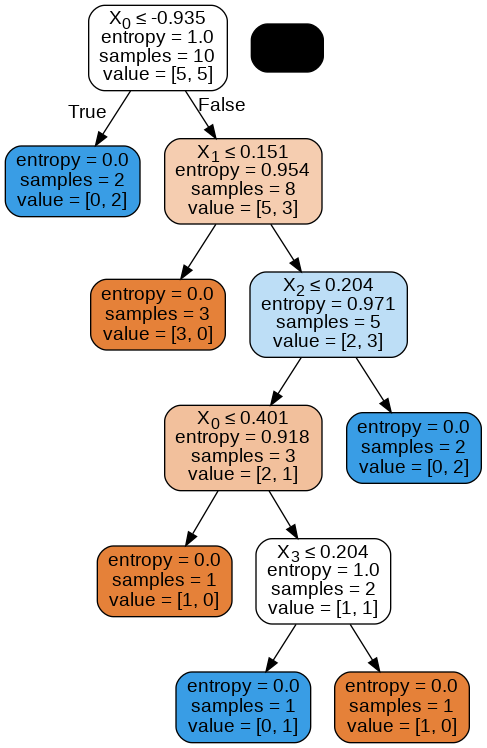

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn import tree
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus
dot_data = StringIO()

data=tree.export_graphviz(classifier,
                          out_file = None,
                          filled = True, rounded = True, special_characters = True)

graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())